### This notebook works with dog-project conda env that is installed with 

https://github.com/parksoy/Soyoung_Udacity_ND_DeepLearning/blob/master/3.Convolutional_networks/7_dog-project/requirements/dog-linux-gpu.yml

in AWS, deep learning AMI with source code, ubuntu, CUDA8. N. Virginia server was chosen.

In [1]:
# Check for a GPU
import tensorflow as tf
print(tf.test.gpu_device_name())

In [23]:
%%bash
pwd

/home/ubuntu/Soyoung_Udacity_ND_DeepLearning/5.Generative_Adversarial_Networks/3_face_generation


# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [24]:
data_dir = 'data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

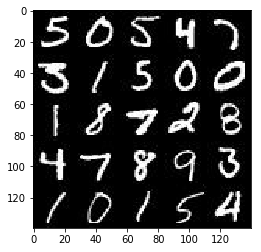

In [25]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
# Note: because of a version problem with matplot lib, the following line of code doesn't work in this workspace.
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

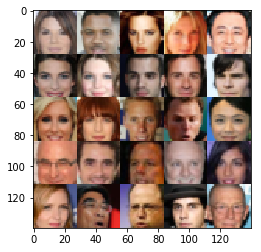

In [26]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [27]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [28]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height,image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate=tf.placeholder(tf.float32, name='learning_rate')
  

    return  inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

### reviewer#1 

#### Discriminator  
1) Leaky ReLU activation function helps with the gradient flow and alleviate the problem of sparse gradients (almost 0 gradients). Max pooling generates sparse gradients, which affects the stability of GAN training. That’s the reason, you chose not to use pooling.

2) You have used batch normalization to stabilize GAN training by reducing internal covariant shift. You can go to this link[http://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html] for further understanding Batch norm.

3) You have used Sigmoid as the activation function for the output layer which produces probability-like values between 0 and 1.

Improvement to make:
<font color='red'>
1) Use custom weight initialization. For example Xavier weight initialization to help converge faster by breaking symmetry or you can also use truncated_normal_initializer with stddev=0.02, which improve overall generated image quality, like in DCGAN paper.  

2) Experiment with various values of alpha (slope of the leaky Relu as stated in DCGAN paper) between 0.06 and 0.18 and compare your results.  
 
3) Experiment with dropout layers for discriminator, applying dropout will decrease hyper learning distrib. If discriminator end up dominating generator, we must reduce discriminator learning rate and increase dropout.   
</font>  


Ref: F. Chollet, "Deep Learning with Python" chapt 8.32".   

Use: 

```
dp_layer = tf.nn.dropout(l_relu_output, keep_prob =0.8) or 
dp_layer = tf.layer.dropout(l_relu_output, rate =0.2)
```

In [39]:
#https://discussions.udacity.com/t/discriminator-variable-scope-reuse/662468

depth = 64 #==filters=the dimensionality of the output space(i.e. the number of filters in the convolution).
kernel_size=5 # kernel_size=height and width of the 2D convolution window
strides=2

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse) :  
        
        alpha=0.2 #if this is not within this variable_scope, can not pass test: assert mock_variable_scope.call_args == mock.call('discriminator', reuse=True)
        #tf.variable_scope called with wrong arguments in Discriminator Inference(reuse=True)
        
        # Hidden layer #1: Input layer is 28x28x3
        h1 = tf.layers.conv2d(images, filters=depth, kernel_size = kernel_size, strides=strides, padding='same')
        relu1 = tf.maximum(alpha * h1, h1)
        # 14x14x64 now
        
        # Hidden layer #2: 
        h2 = tf.layers.conv2d(relu1, filters=depth*2, kernel_size = kernel_size, strides=strides, padding='same')
        bn2 = tf.layers.batch_normalization(h2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128 now
        
        # Hidden layer #3: 
        h3 = tf.layers.conv2d(relu2, filters=depth*4, kernel_size = kernel_size, strides=strides, padding='same')
        bn3 = tf.layers.batch_normalization(h3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 3x3x256 now

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*depth*4))
        logits = tf.layers.dense(flat, 1)
        isFakeReal = tf.nn.sigmoid(logits)
        
        return isFakeReal, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

### Reviewer#1

#### Generator  

You have used Tanh as the last layer of the generator output, so you will normalize the input images to be between -1 and 1 in train function.

You have met the basic requirements, but I recommend you to work on the below tips and comment on the improvements you see in the generated image.

<font color='red'>  
    
1) Experiment with more conv2d_transpose layers in generator block so that there're enough parameters in the network to learn the concepts of the input images. **DCGAN models produce better results when generator is bigger than discriminator.**  

Suggestion: 1024->512->256->128->out_channel_dim (Use stride as 1 to increase the number of layers without changing the size of the output image).   

2) Experiment with different slope values for leaky_relu as told in discriminator.  

3) Experiment dropout in generator, so that it is less prone to learning the data distribution and avoid generating images that look like noise.   

(CONV/FC -> BatchNorm -> ReLu(or other activation) -> Dropout -> CONV/FC)  
</font>

In [40]:
def generator(z, out_channel_dim,  is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # Using the reverse process of the discriminator
        alpha=0.2
        
        # Hidden layer #1: starts with 1024
        h1 = tf.layers.dense(z, 2*2*depth*4) # First fully connected layer
        h1 = tf.reshape(h1, (-1, 2, 2, depth*4)) ## Reshape it to start the convolutional stack 2x2x256
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
        #2x2x256 now
        
        # Hidden layer #2:
        h2 = tf.layers.conv2d_transpose(h1, depth*2, kernel_size = kernel_size, strides=strides, padding='valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
        #7x7x128 now
        
        # Hidden layer #3:
        h3 = tf.layers.conv2d_transpose(h2, depth, kernel_size = kernel_size, strides=strides, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
        #14x14x64 now
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, kernel_size = kernel_size, strides=strides, padding='same')
        fake_image = tf.tanh(logits)
        #28x28x3 or 28x28x1 now
    
        return fake_image



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

### Reviewer #1

<font color='red'>    
Experiment with label smoothing for discriminator loss, it prevents discriminator from being too strong and to   generalize in a better way.    
</font>
Refer https://arxiv.org/abs/1606.03498

Below is a starter code,   
 
```python
d_loss_real = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
```

In [41]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Initializing Variables with predictions
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculate the Losses for it real, fake & generated models
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    # The Discriminator Loss is the amount of it fake img loss + it real img loss
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

### Reviewer #1 

<font color='red'>    
To avoid internal covariant shift during training, you use batch norm. But in tensorflow **when is_train is true and you have used batch norm, mean and variance needs to be updated before optimization**. So, you add control dependency on the update ops before optimizing the network.   
</font>  

    More Info here 

http://ruishu.io/2016/12/27/batchnorm/

In [42]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Empty TF TrainableVariables
    t_vars = tf.trainable_variables()
    # Append var to D & G vars arraies if it starts with the "prefix" for on it name
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # discriminator optimization
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
    
    # UPDATE OPS GraphKeys
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [43]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

### Reviewer #1

Great work combining all the functions together and making it a DCGAN.

Good job scaling the input images to the same scale as the generated ones using batch_images *= 2.0 .

Tip:   
  
**Execute the optimization for generator twice. This ensures that the discriminator loss does not go to 0 and impede learning.**  

Extra:  
1) Talk on “How to train a GAN” by one of the author of original DCGAN paper here..https://www.youtube.com/watch?v=X1mUN6dD8uE

2) Here is a post on Gan hacks, https://github.com/soumith/ganhacks  

<font color='red'>
3) Plot discriminator and generator loss for better understanding. You can utilize the below code snippet to plot the loss graph to get a better understanding.
</font>

```
d,_ = sess.run(…)
g,_ = sess.run(…)
d_loss_vec.append(d)
g_loss_vec.append(g)
```

At the end, you can include the below code to plot the final array:

```
Discriminator_loss, = plt.plot(d_loss_vec, color='b', label='Discriminator loss')
Genereator_loss, = plt.plot(g_loss_vec, color='r', label='Generator loss')
plt.legend(handles=[ Discriminator_loss, Genereator_loss])
```


In [44]:
def train(epochs, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epochs: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, img_width, img_height, img_channels = data_shape # 28x28x3 or 28x28x1
    real_input_img, z_input, lr = model_inputs(img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input_img, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    samples, losses = [], []
    n_images = 25        
    print_every = 20
    show_every = 100
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1 
                batch_images *= 2.0 
                
                # Sample random "noise vector" for generator
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim)) 
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={real_input_img: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={z_input: z_sample, lr: learning_rate})
                
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input_img: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                
                # Showing the generator image output for every = show_every step
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

### Reviewer #1

The hyperparameters chosen are correct. You can further improve the quality of the generated image by experimenting with the parameters and the tips I provided in discriminator, generator and model loss. Below are a few extra tips on choosing the hyperparameters for starters...

Tips: 
1) Try using different values of learning rate between 0.0002 and 0.0008, this DCGAN architectural structure remains stable within that range.

2) Experiment with different values of beta1 between 0.2 and 0.5 and compare your results. Here's a good post explaining the importance of beta values and which value might be empirically better. http://ruder.io/optimizing-gradient-descent/index.html#adam.

3) An important point to note is, batch size and learning rate are linked. If the batch size is too small then the gradients will become more unstable and would need to reduce the learning rate and vice versa. Start point for experimenting on batch size would be somewhere between 16 to 32.

Extra: You can also go through Population based training of neural networks, https://deepmind.com/blog/population-based-training-neural-networks/ it is a new method for training neural networks which allows an experimenter to quickly choose the best set of hyperparameters and model for the task.



Epoch 1/2... Discriminator Loss: 0.7828... Generator Loss: 4.4154
Epoch 1/2... Discriminator Loss: 1.4625... Generator Loss: 0.6103
Epoch 1/2... Discriminator Loss: 0.3525... Generator Loss: 2.3712
Epoch 1/2... Discriminator Loss: 2.0473... Generator Loss: 0.3538
Epoch 1/2... Discriminator Loss: 0.6508... Generator Loss: 1.4667


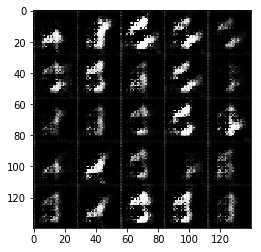

Epoch 1/2... Discriminator Loss: 0.7710... Generator Loss: 1.9827
Epoch 1/2... Discriminator Loss: 0.3186... Generator Loss: 2.0365
Epoch 1/2... Discriminator Loss: 0.3930... Generator Loss: 4.0892
Epoch 1/2... Discriminator Loss: 0.2831... Generator Loss: 2.3484
Epoch 1/2... Discriminator Loss: 0.4488... Generator Loss: 3.8675


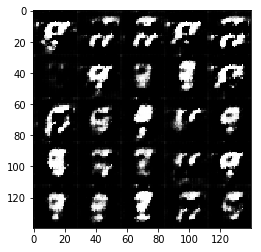

Epoch 1/2... Discriminator Loss: 0.9655... Generator Loss: 3.6909
Epoch 1/2... Discriminator Loss: 1.2603... Generator Loss: 0.6432
Epoch 1/2... Discriminator Loss: 0.3978... Generator Loss: 2.8127
Epoch 1/2... Discriminator Loss: 0.5011... Generator Loss: 2.0379
Epoch 1/2... Discriminator Loss: 0.3345... Generator Loss: 4.3747


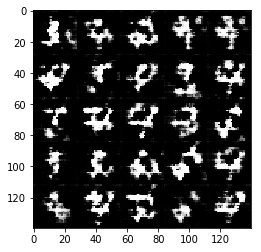

Epoch 1/2... Discriminator Loss: 0.5507... Generator Loss: 2.0386
Epoch 1/2... Discriminator Loss: 0.5580... Generator Loss: 1.8913
Epoch 1/2... Discriminator Loss: 0.5690... Generator Loss: 1.7695
Epoch 1/2... Discriminator Loss: 0.7801... Generator Loss: 4.1927
Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 0.5928


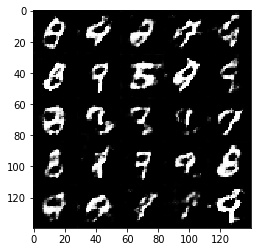

Epoch 1/2... Discriminator Loss: 0.4624... Generator Loss: 2.0231
Epoch 1/2... Discriminator Loss: 1.5489... Generator Loss: 4.0490
Epoch 1/2... Discriminator Loss: 0.6434... Generator Loss: 1.3977
Epoch 2/2... Discriminator Loss: 0.6919... Generator Loss: 2.8637
Epoch 2/2... Discriminator Loss: 0.8664... Generator Loss: 1.3096


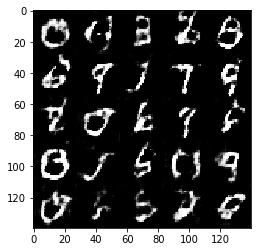

Epoch 2/2... Discriminator Loss: 0.7955... Generator Loss: 1.2690
Epoch 2/2... Discriminator Loss: 0.6508... Generator Loss: 1.4480
Epoch 2/2... Discriminator Loss: 0.6120... Generator Loss: 2.0194
Epoch 2/2... Discriminator Loss: 0.7174... Generator Loss: 1.5376
Epoch 2/2... Discriminator Loss: 0.7854... Generator Loss: 0.9675


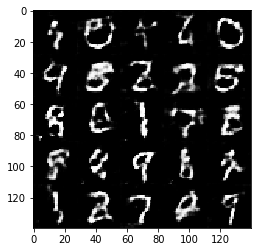

Epoch 2/2... Discriminator Loss: 0.7204... Generator Loss: 1.8504
Epoch 2/2... Discriminator Loss: 0.8138... Generator Loss: 1.7899
Epoch 2/2... Discriminator Loss: 0.7543... Generator Loss: 2.0249
Epoch 2/2... Discriminator Loss: 0.7226... Generator Loss: 1.4389
Epoch 2/2... Discriminator Loss: 0.8061... Generator Loss: 1.8656


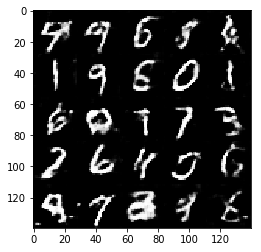

Epoch 2/2... Discriminator Loss: 1.1989... Generator Loss: 2.5652
Epoch 2/2... Discriminator Loss: 1.3011... Generator Loss: 0.5560
Epoch 2/2... Discriminator Loss: 1.2241... Generator Loss: 0.5652
Epoch 2/2... Discriminator Loss: 0.7254... Generator Loss: 1.7903
Epoch 2/2... Discriminator Loss: 0.8778... Generator Loss: 0.8403


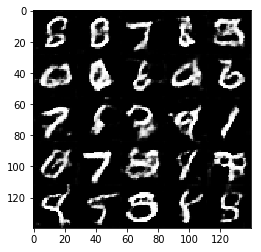

Epoch 2/2... Discriminator Loss: 0.9901... Generator Loss: 0.9780
Epoch 2/2... Discriminator Loss: 0.8175... Generator Loss: 1.1029
Epoch 2/2... Discriminator Loss: 1.0105... Generator Loss: 0.7333
Epoch 2/2... Discriminator Loss: 1.1913... Generator Loss: 0.5252
Epoch 2/2... Discriminator Loss: 2.6138... Generator Loss: 0.1417


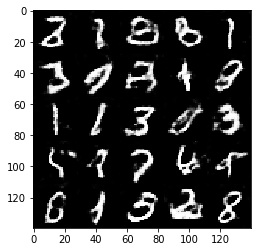

Epoch 2/2... Discriminator Loss: 0.8620... Generator Loss: 1.3401


In [45]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.5 # AdamOptimizer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

In [46]:
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
mnist_dataset.shape

(60000, 28, 28, 1)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

### Reviewer #1

<font color='red'>  
If you want to generate varied face shapes, experiment with the value of z_dim (probably in the range 128 - 256).  
</font>  

Epoch 1/1... Discriminator Loss: 3.1259... Generator Loss: 0.2654
Epoch 1/1... Discriminator Loss: 0.4314... Generator Loss: 3.5471
Epoch 1/1... Discriminator Loss: 0.6978... Generator Loss: 1.2823
Epoch 1/1... Discriminator Loss: 0.3410... Generator Loss: 2.4236
Epoch 1/1... Discriminator Loss: 3.1485... Generator Loss: 0.1202


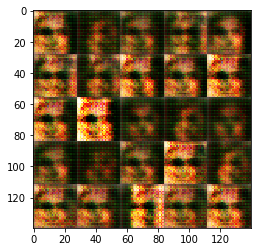

Epoch 1/1... Discriminator Loss: 0.4109... Generator Loss: 2.9371
Epoch 1/1... Discriminator Loss: 1.3081... Generator Loss: 0.7688
Epoch 1/1... Discriminator Loss: 1.2395... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 0.8905
Epoch 1/1... Discriminator Loss: 0.6792... Generator Loss: 1.2364


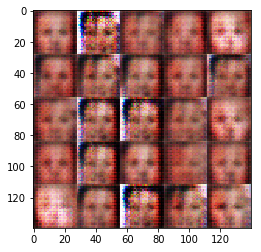

Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.5030
Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 1.0654
Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.8447
Epoch 1/1... Discriminator Loss: 1.4947... Generator Loss: 0.6806
Epoch 1/1... Discriminator Loss: 1.0919... Generator Loss: 1.9223


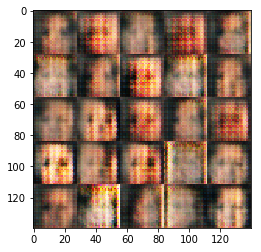

Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 1.3762
Epoch 1/1... Discriminator Loss: 0.7953... Generator Loss: 1.6274
Epoch 1/1... Discriminator Loss: 1.1921... Generator Loss: 0.9740
Epoch 1/1... Discriminator Loss: 0.9131... Generator Loss: 0.9563
Epoch 1/1... Discriminator Loss: 1.0086... Generator Loss: 1.0788


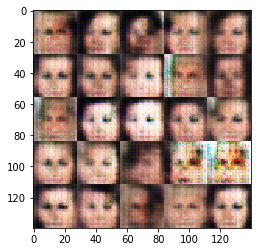

Epoch 1/1... Discriminator Loss: 1.9468... Generator Loss: 0.2343
Epoch 1/1... Discriminator Loss: 1.1737... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.0577... Generator Loss: 1.3844
Epoch 1/1... Discriminator Loss: 0.8845... Generator Loss: 0.8651
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 1.5969


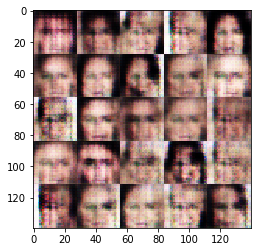

Epoch 1/1... Discriminator Loss: 0.7706... Generator Loss: 1.2406
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.4753
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 0.9906
Epoch 1/1... Discriminator Loss: 1.0654... Generator Loss: 2.2305
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.5262


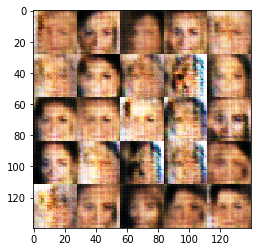

Epoch 1/1... Discriminator Loss: 0.9252... Generator Loss: 0.9901
Epoch 1/1... Discriminator Loss: 0.7950... Generator Loss: 1.4015
Epoch 1/1... Discriminator Loss: 0.8600... Generator Loss: 1.1956
Epoch 1/1... Discriminator Loss: 0.8426... Generator Loss: 2.1666
Epoch 1/1... Discriminator Loss: 0.9698... Generator Loss: 0.7863


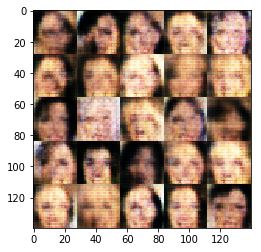

Epoch 1/1... Discriminator Loss: 0.9836... Generator Loss: 1.6841
Epoch 1/1... Discriminator Loss: 2.2492... Generator Loss: 3.9589
Epoch 1/1... Discriminator Loss: 0.9779... Generator Loss: 1.6114
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 1.6267
Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 0.8967


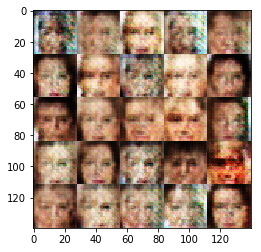

Epoch 1/1... Discriminator Loss: 0.8587... Generator Loss: 1.2046
Epoch 1/1... Discriminator Loss: 1.1117... Generator Loss: 0.6025
Epoch 1/1... Discriminator Loss: 1.0901... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 0.7987... Generator Loss: 1.2081
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 0.4857


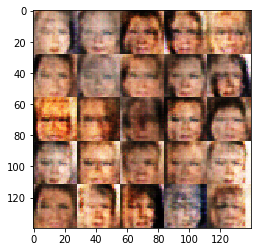

Epoch 1/1... Discriminator Loss: 1.0506... Generator Loss: 1.8031
Epoch 1/1... Discriminator Loss: 0.8341... Generator Loss: 1.1781
Epoch 1/1... Discriminator Loss: 0.7273... Generator Loss: 1.0947
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 1.4541
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 0.7730


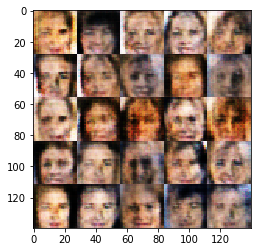

Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 1.2862... Generator Loss: 0.5233
Epoch 1/1... Discriminator Loss: 1.0043... Generator Loss: 1.1729


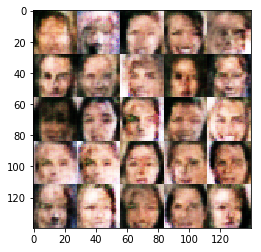

Epoch 1/1... Discriminator Loss: 0.8719... Generator Loss: 1.0058
Epoch 1/1... Discriminator Loss: 1.2057... Generator Loss: 0.6260
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 1.2220
Epoch 1/1... Discriminator Loss: 1.2411... Generator Loss: 0.5473
Epoch 1/1... Discriminator Loss: 1.0633... Generator Loss: 1.9111


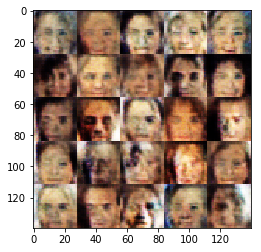

Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.5235
Epoch 1/1... Discriminator Loss: 1.9242... Generator Loss: 0.2959
Epoch 1/1... Discriminator Loss: 0.8932... Generator Loss: 1.1588
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.5556
Epoch 1/1... Discriminator Loss: 1.7432... Generator Loss: 2.6559


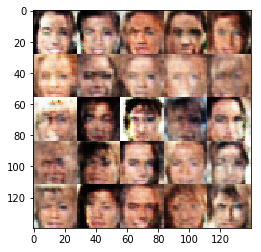

Epoch 1/1... Discriminator Loss: 0.9610... Generator Loss: 0.9385
Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 2.2117
Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 2.5942
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.5033
Epoch 1/1... Discriminator Loss: 0.8141... Generator Loss: 1.3798


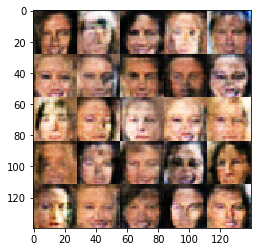

Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 1.5665
Epoch 1/1... Discriminator Loss: 1.1599... Generator Loss: 1.5137
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 1.3903
Epoch 1/1... Discriminator Loss: 0.7443... Generator Loss: 1.0939
Epoch 1/1... Discriminator Loss: 0.8883... Generator Loss: 1.2860


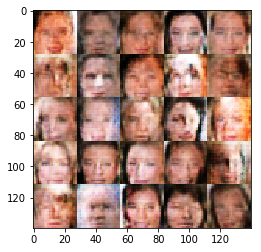

Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.7070
Epoch 1/1... Discriminator Loss: 1.1365... Generator Loss: 0.8556
Epoch 1/1... Discriminator Loss: 0.8582... Generator Loss: 1.3648
Epoch 1/1... Discriminator Loss: 1.4920... Generator Loss: 2.7809


In [47]:
batch_size = batch_size
z_dim = z_dim
learning_rate = learning_rate
beta1 = beta1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

In [48]:
celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
celeba_dataset.shape

(202599, 28, 28, 3)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.